

# Libraries



In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Data insights

In [174]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [175]:
# Displaying basic information about the dataset
print(df.info())

# Displaying summary statistics of numerical columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [186]:
# Checking for null values
null_values = df.isnull().sum()
print("Null Values:")
print(null_values)


Null Values:
CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Male               0
Segment                   0
dtype: int64





# EDA






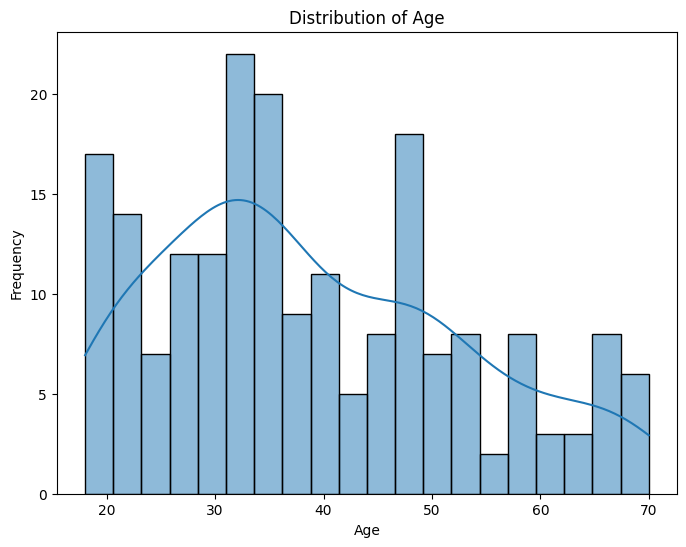

In [176]:
# Histogram of Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


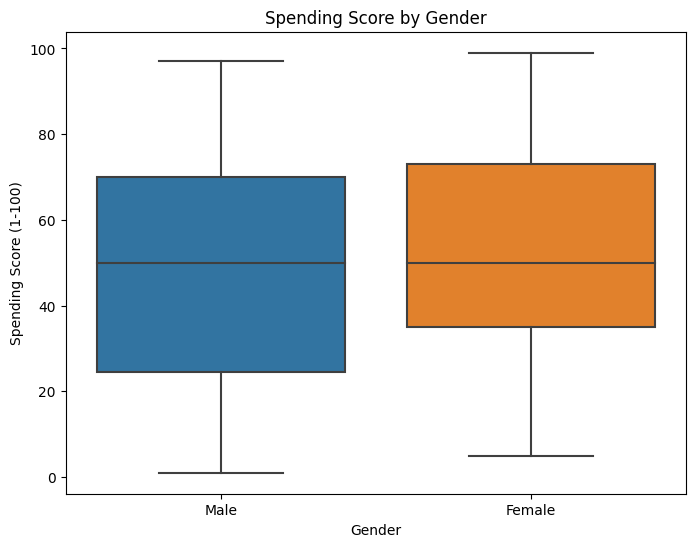

In [177]:
# Box plot of Spending Score by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')
plt.show()


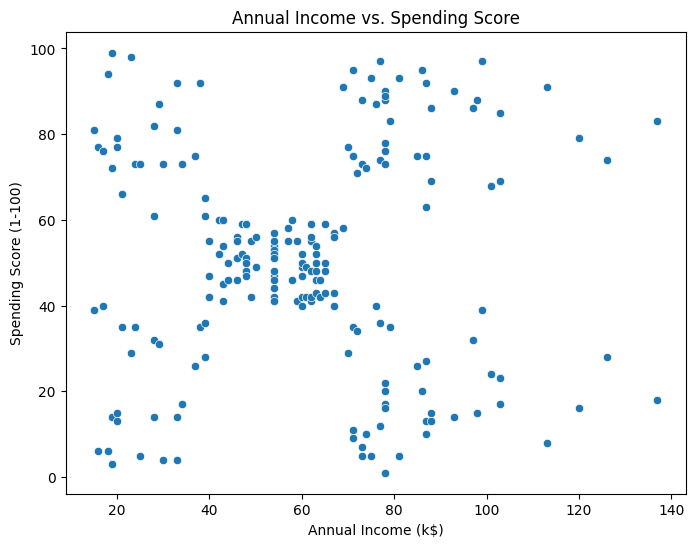

In [178]:
# Scatter plot of Annual Income vs. Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs. Spending Score')
plt.show()


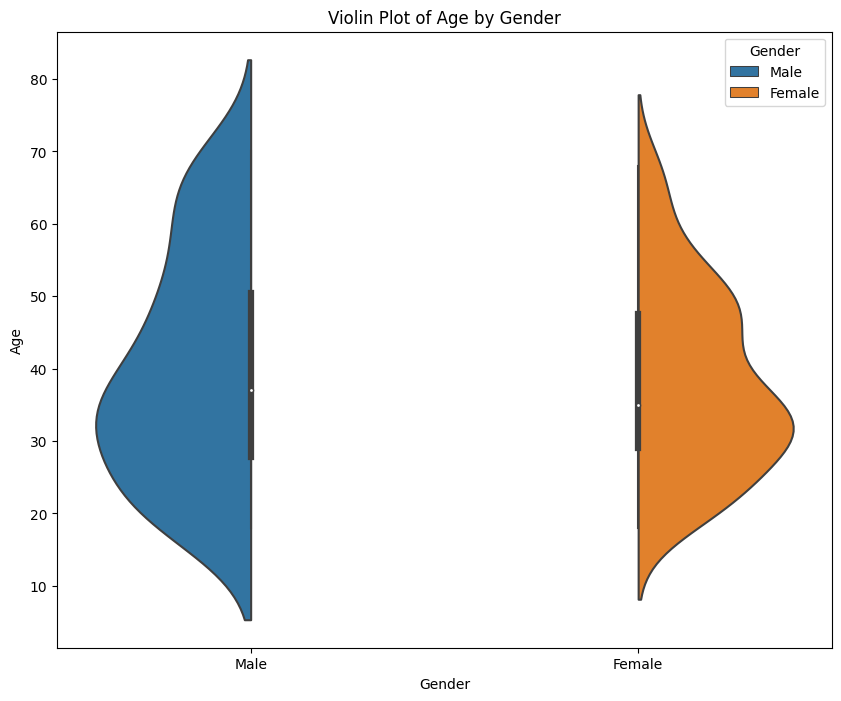

In [180]:
# Violin plot of Age distribution by Gender
plt.figure(figsize=(10, 8))
sns.violinplot(x='Gender', y='Age', data=df, hue='Gender', split=True)
plt.title('Violin Plot of Age by Gender')
plt.show()


# Main

In [181]:
# Pandas get_dummies to perform one-hot encoding for Gender column
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [182]:
numerical_features = ['Age','Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']

# Selecting features for segmentation
features_for_segmentation = df[numerical_features]

# The number of clusters (k)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and predict clusters
df['Segment'] = kmeans.fit_predict(features_for_segmentation)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [183]:
# Analyze the characteristics of each segment
segment_means = df.groupby('Segment')[numerical_features].mean()
print(segment_means)


               Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
Segment                                                                    
0        40.394737           87.000000               18.631579     0.526316
1        40.325203           44.154472               49.829268     0.406504
2        32.692308           86.538462               82.128205     0.461538


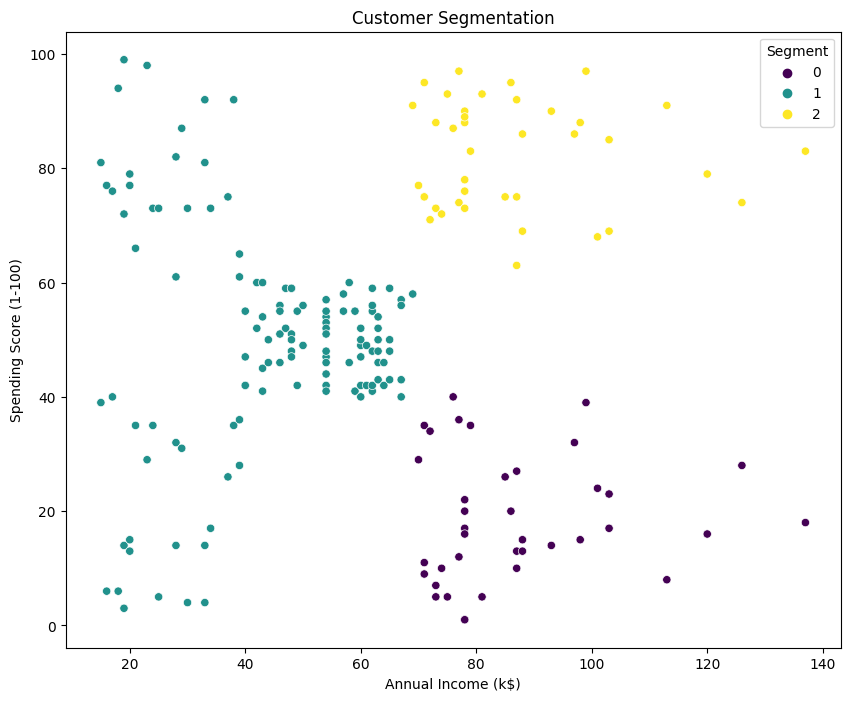

In [184]:
# Visualize the results with a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segment', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.show()


# Simple Recommendation System using the K-means model

In [185]:
# Recommend spending score segment for a new customer
new_customer = pd.DataFrame({'Age':[30], 'Annual Income (k$)': [20], 'Spending Score (1-100)': [20], 'Gender_Male': [0]})

# Predicting using Kmeans model
predicted_cluster = kmeans.predict(new_customer)

# Analyze the Spending Score for the predicted cluster
predicted_cluster_df = df[df['Segment'] == predicted_cluster[0]]
average_spending_score = predicted_cluster_df['Spending Score (1-100)'].mean()

print("\nPredicted Spending report for the New Customer")
print("\t\tCustomer Segment:", predicted_cluster[0])
print("\t\tAverage Spendings for the new customer :", average_spending_score)


Predicted Spending report for the New Customer
		Customer Segment: 1
		Average Spendings for the new customer : 49.829268292682926
